# Clustering

![Picture title](image-20230222-183057.png)

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#         100 ejemplos  , 4 clusters, 2 fetures,  desviacion cluster 
x, y = make_blobs(n_samples=100, centers=4, n_features =2, cluster_std=[1, 1.5, 2, 2], random_state=42 )
x

array([[-10.53191519,   4.29382847],
       [ -5.25259276,  -9.34183823],
       [ -2.97867201,   9.55684617],
       [ -4.07403857,  -9.68381172],
       [ -8.12275304,   8.44509197],
       [ -8.86069984,  -8.01270505],
       [  5.13677398,   3.43648737],
       [  4.310371  ,   2.50883854],
       [  4.78549516,   3.42613717],
       [ -3.6601912 ,   9.38998415],
       [ -3.05358035,   9.12520872],
       [ -6.42470732,  -4.26582408],
       [ -5.83574406,  -6.28614025],
       [  2.98037638,   0.17885975],
       [ -1.77073104,   9.18565441],
       [-10.98011275,   8.28846775],
       [ -8.28494616,   8.97788941],
       [  4.53186365,   3.47846903],
       [-10.60604263,   7.63097313],
       [ -7.89185251,   7.17786509],
       [ -2.97261532,   8.54855637],
       [ -8.99253118,   8.00582687],
       [ -9.73135766,   9.0363205 ],
       [  5.18197224,   4.28022453],
       [  4.58613978,   4.32013517],
       [ -2.96983639,  10.07140835],
       [  2.51682272,   1.3422017 ],
 

In [6]:
y

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 1, 3, 1, 2, 0,
       0, 2, 2, 3, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3,
       2, 3, 1, 2, 1, 2, 3, 0, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 3, 1])

In [9]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y 
})
df_blobls

,x1,x2,y
0,-10.531915,4.293828,3
1,-5.252593,-9.341838,2
2,-2.978672,9.556846,0
3,-4.074039,-9.683812,2
4,-8.122753,8.445092,3
...,...,...,...
95,-3.186120,9.625962,0
96,-1.478198,9.945566,0
97,4.397950,2.579246,1
98,-6.672225,9.431127,3


In [12]:
def plot_2d_cluster(x, y, ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title = f'{len(y_uniques)} Clusters',
            kind= 'scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


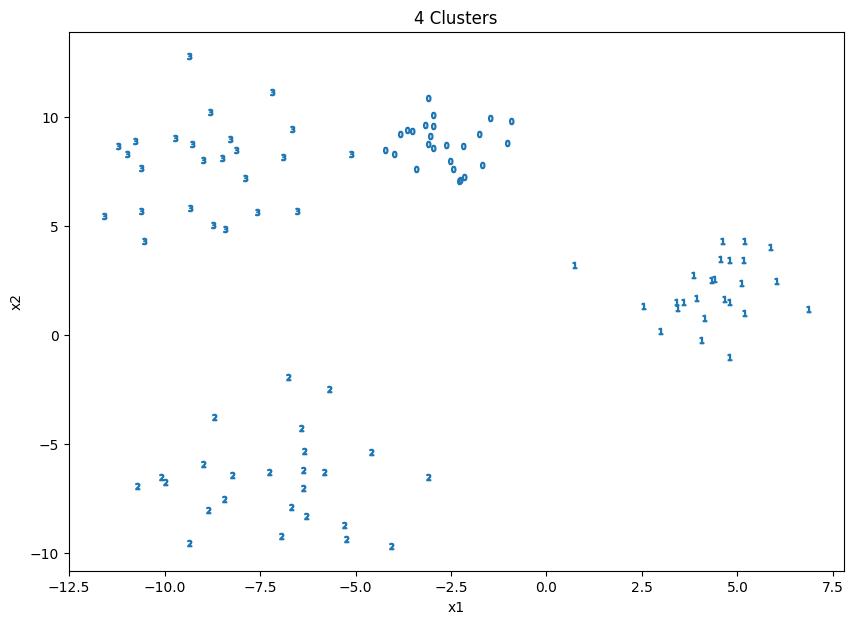

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
x, y = df_blobls[['x1', 'x2']], df_blobls['y']
plot_2d_cluster(x, y, ax)

### APLICANDO CLUSTERS

In [18]:
from  sklearn.cluster import KMeans

In [19]:
kemeans = KMeans(n_clusters=4, random_state=42)

In [22]:
y_pred = kemeans.fit_predict(x)
y_pred

array([2, 1, 3, 1, 2, 1, 0, 0, 0, 3, 3, 1, 1, 0, 3, 2, 2, 0, 2, 2, 3, 2,
       2, 0, 0, 3, 0, 2, 2, 1, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 2, 0, 1, 3,
       3, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 3, 3, 0, 3, 1, 0, 2, 1, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 3, 1, 2, 1, 2, 1, 1, 0, 1, 3, 3, 3, 3, 3, 1,
       3, 0, 0, 1, 3, 1, 3, 3, 3, 0, 2, 0], dtype=int32)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Paramete

Text(0.5, 1.0, 'Predicted 4 Clusters')

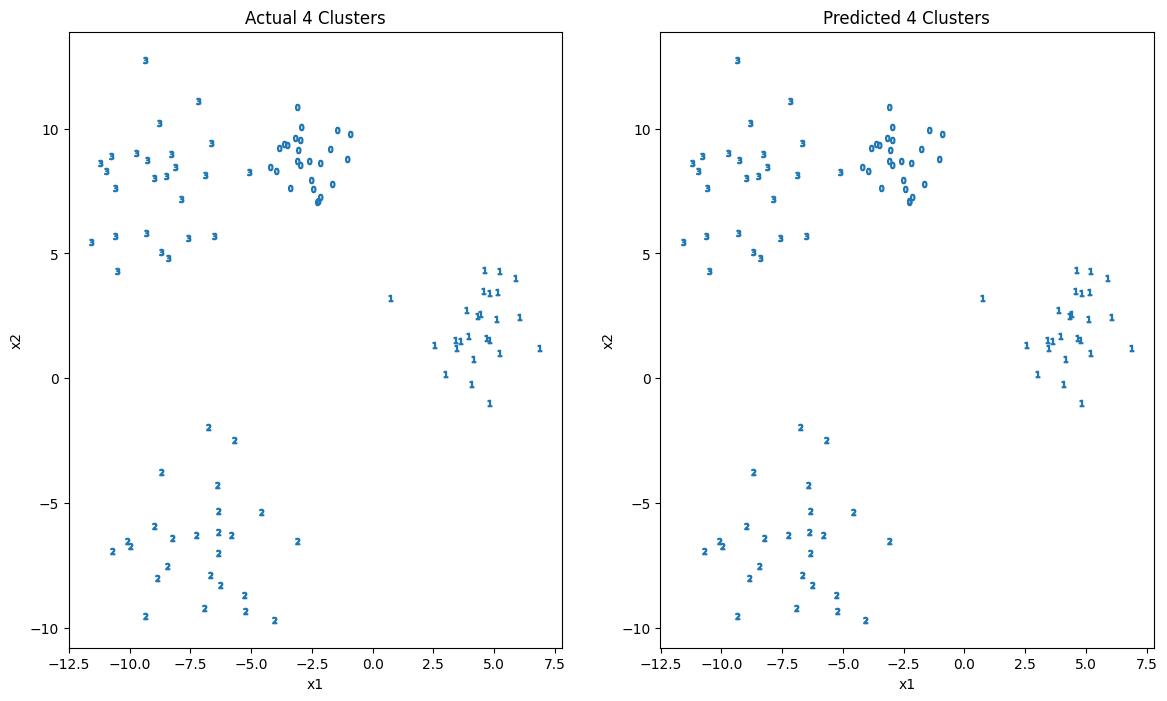

In [28]:
fig, ax = plt.subplots(1,2, figsize = (14,8))
plot_2d_cluster(x, y, ax[0])
plot_2d_cluster(x, y, ax[1])
ax[0].set_title(f'Actual {ax[0].get_title()}')
ax[1].set_title(f'Predicted {ax[1].get_title()}')

![Picture title](image-20230223-192735.png)

### COMO EVALUAR UN CLUSTER

![Picture title](image-20230223-194257.png)

![Picture title](image-20230223-194354.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5465a4f9-c71e-4169-93d0-311556d10c3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>